In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

df = pd.read_csv("ecommerce_return_enhanced.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                10000 non-null  object 
 1   Product_ID              10000 non-null  object 
 2   User_ID                 10000 non-null  object 
 3   Order_Date              10000 non-null  object 
 4   Return_Date             5052 non-null   object 
 5   Product_Category        10000 non-null  object 
 6   Product_Price           10000 non-null  float64
 7   Order_Quantity          10000 non-null  int64  
 8   Return_Reason           10000 non-null  object 
 9   Return_Status           10000 non-null  object 
 10  Days_to_Return          10000 non-null  float64
 11  User_Age                10000 non-null  int64  
 12  User_Gender             10000 non-null  object 
 13  User_Location           10000 non-null  object 
 14  Payment_Method          10000 non-null 

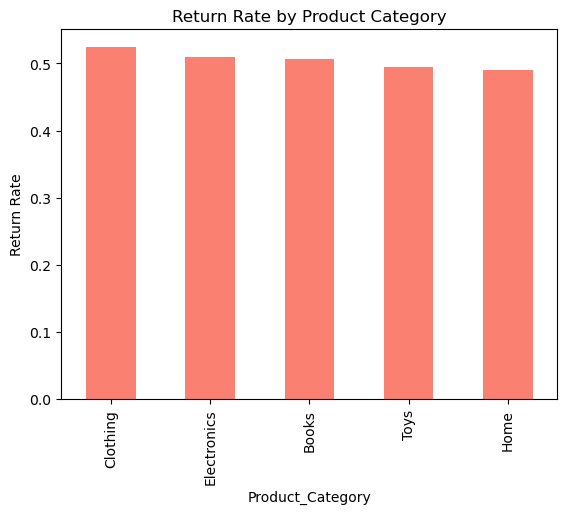

In [3]:
# Return rate by category
category_return_rate = df.groupby("Product_Category")['Return_Label'].mean().sort_values(ascending=False)
category_return_rate.plot(kind='bar', title='Return Rate by Product Category', color='salmon')
plt.ylabel('Return Rate')
plt.show()

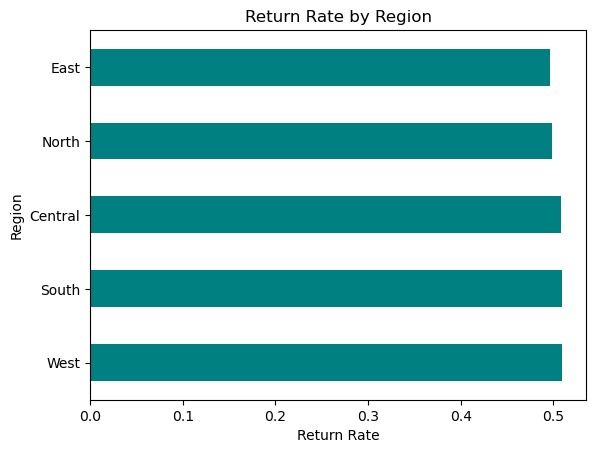

In [5]:
# Return rate by region
region_return = df.groupby("Region")['Return_Label'].mean().sort_values(ascending=False)
region_return.plot(kind='barh', title='Return Rate by Region', color='teal')
plt.xlabel('Return Rate')
plt.show()

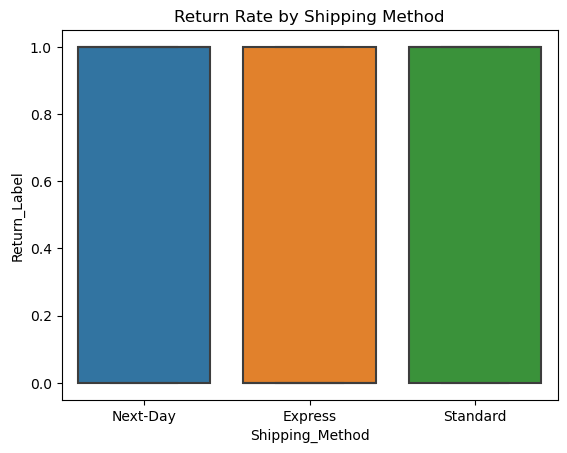

In [7]:
#Return Rate by Shipping Method
sns.boxplot(x="Shipping_Method", y="Return_Label", data=df)
plt.title("Return Rate by Shipping Method")
plt.show()

C:\Users\ushas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


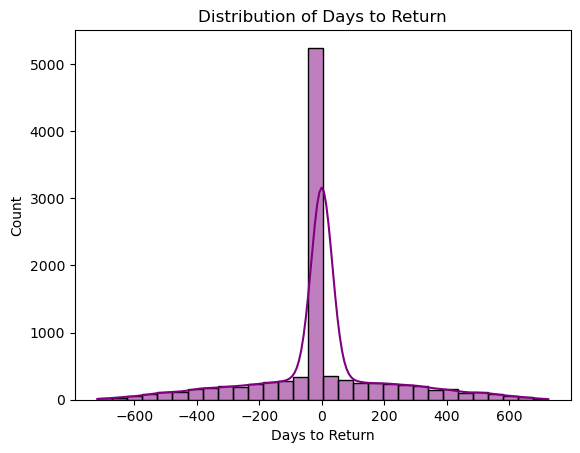

In [9]:
sns.histplot(df['Days_to_Return'].dropna(), bins=30, kde=True, color='purple')
plt.title("Distribution of Days to Return")
plt.xlabel("Days to Return")
plt.show()

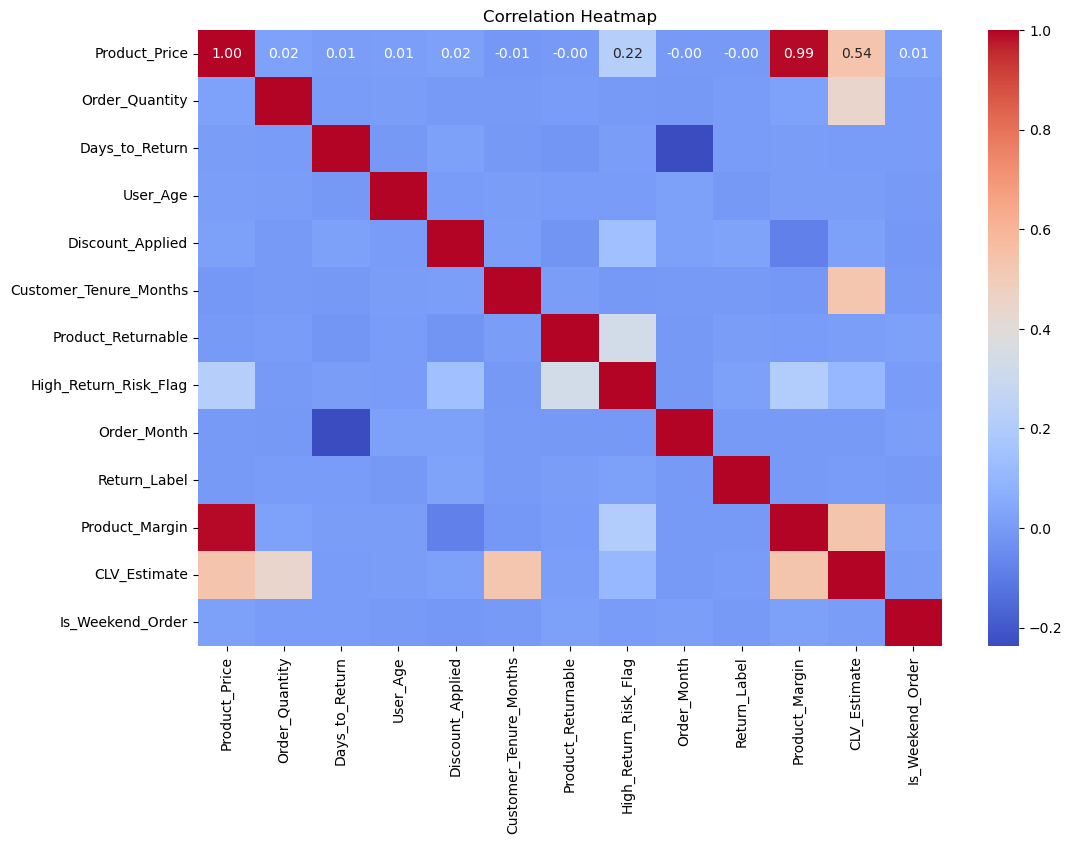

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
features = ['Product_Price', 'Discount_Applied', 'Customer_Tenure_Months',
            'Product_Returnable', 'Is_Weekend_Order', 'Product_Margin', 'CLV_Estimate']
X = df[features]
y = df['Return_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

[[343 666]
 [349 642]]
              precision    recall  f1-score   support

           0       0.50      0.34      0.40      1009
           1       0.49      0.65      0.56       991

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.49      0.49      0.48      2000

ROC AUC Score: 0.4825590872860701


In [31]:
df['Return_Probability'] = model.predict_proba(X)[:, 1]

# Save products with >51% return probability
high_risk = df[df['Return_Probability'] > 0.51]
high_risk.to_csv("high_return_risk_products.csv", index=False)

print("Exported high-risk products to CSV.")

Exported high-risk products to CSV.


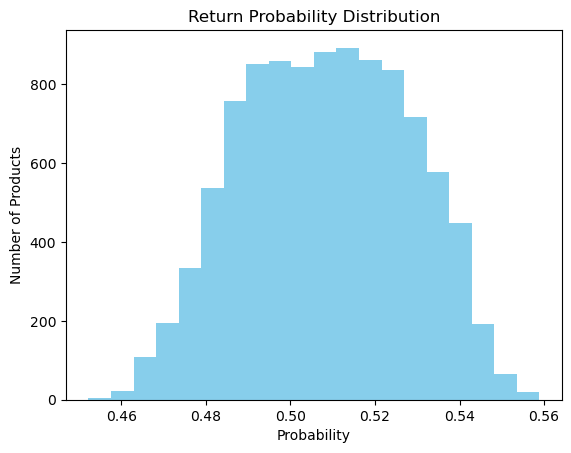

In [33]:
import matplotlib.pyplot as plt

plt.hist(df['Return_Probability'], bins=20, color='skyblue')
plt.title('Return Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Number of Products')
plt.show()


In [35]:
output_path = r"C:\Users\ushas\OneDrive\Desktop\high_return_risk_products.csv"
df.to_csv(output_path, index=False)
print("high_return_risk_products file saved to Desktop!")

high_return_risk_products file saved to Desktop!
